# Credit Card Fraud Detection Project

This project uses the dataset from https://www.kaggle.com/mlg-ulb/creditcardfraud.

The project uses the unsupervised learning algorithm Isolation Forest and the evaluation technique precision-recall to identify fraudulent credit card transactions based on the behaviour of the rest of the dataset.
    

In [1]:
## import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load the dataset

data = pd.read_csv("creditcard.csv")

## Exploring the dataset

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(data.shape)

(284807, 31)


In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

## Sampling only 10th of the data to work with

In [6]:
data = data.sample(frac= 0.5, random_state=1)

data.shape

(142404, 31)

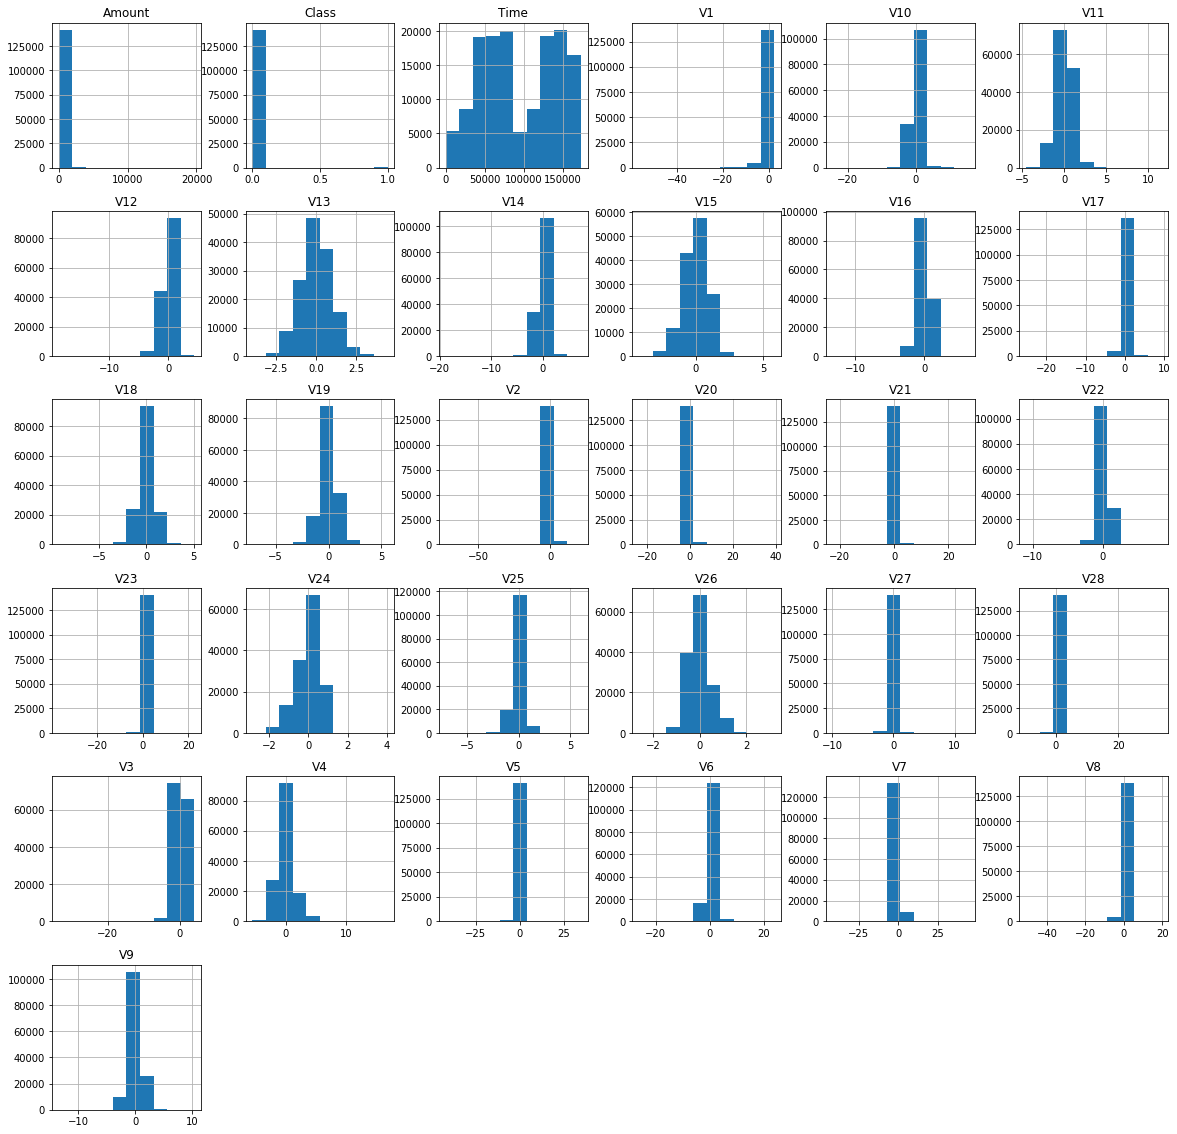

In [7]:
data.hist(figsize = (20,20))
plt.show()

## Detrmine number of fraudulent and valid transcations in our sample 

In [8]:
fraud = data[data["Class"] == 1]
valid = data[data["Class"] == 0]

outlier_fraction = len(fraud) / float(len(valid))

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))
print('Outlier_fraction: {}'.format(outlier_fraction))

Fraud Cases: 227
Valid Cases: 142177
Outlier_fraction: 0.0015966014193575613


We notice here that the number of fraudulent cases is very small which is important to keep in mind when 

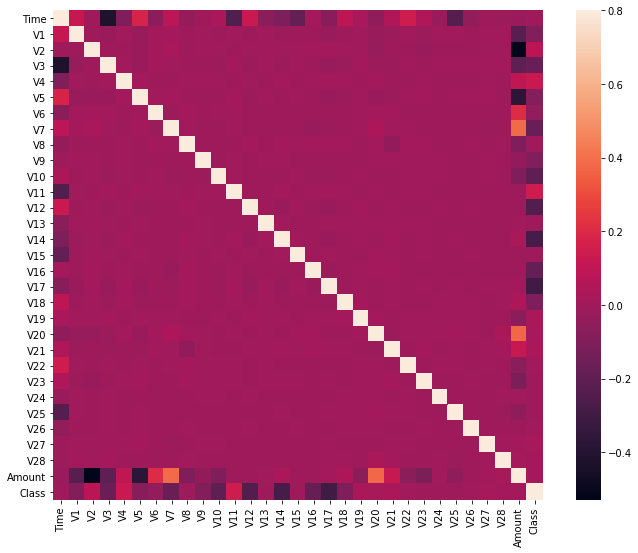

In [9]:
corrmatrix = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmatrix, vmax = .8, square=True)
plt.show()

V17 AND V14 HAVE STRONG NEGATIVE CORRELATION while V11 have strong positive correlation. There isn't strong correlation between time or amount and wether a transaction is fraudulent

In [10]:
## Get all columns from the dataframe
columns = data.columns.tolist()

# Filter the columns to remove datawe don't want 
columns = [c for c in columns if c not in ['Class']]

# store the variable we're predicting on 
target = "Class"

x = data[columns] ## dataset without the calss column
y = data[target] ## class labels for each row in dataset

print(x.shape)
print(y.shape)

(142404, 30)
(142404,)


# Applying the Isolation Forest Algorithm for anamoly detection

In [11]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                       contamination= outlier_fraction,
                                       random_state= state)
}

In [13]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Isolation Forest":
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != y).sum()
    print("{}: {}".format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))


Isolation Forest: 317
0.9977739389342996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.30      0.30      0.30       227

    accuracy                           1.00    142404
   macro avg       0.65      0.65      0.65    142404
weighted avg       1.00      1.00      1.00    142404

